# Import of Libraries and Data

In [280]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
palette = reversed(sns.color_palette("Reds"))

dataset_dir = '/kaggle/input/wine-rating-and-price/'

In [125]:
wine_types = ['Red', 'Rose', 'Sparkling', 'White']
datasets = dict(map(lambda i: (i, pd.read_csv(dataset_dir + i + '.csv')), wine_types))
for t in wine_types:
    datasets[t]['Type'] = t

df = pd.concat(datasets.values())

# Data Understanding

In [128]:
df.shape

(13834, 9)

In [130]:
df.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red


In [131]:
df.columns

Index(['Name', 'Country', 'Region', 'Winery', 'Rating', 'NumberOfRatings',
       'Price', 'Year', 'Type'],
      dtype='object')

In [132]:
df.dtypes

Name                object
Country             object
Region              object
Winery              object
Rating             float64
NumberOfRatings      int64
Price              float64
Year                object
Type                object
dtype: object

In [152]:
df = df[df['Year'] != 'N.V.']
df['Year'] = pd.to_numeric(df['Year'])

In [153]:
df.describe()

,Rating,NumberOfRatings,Price,Year
count,13088.000000,13088.000000,13088.000000,13088.000000
mean,3.868880,331.875688,33.493667,2015.531479
std,0.298975,734.839328,72.608355,3.276619
min,2.500000,25.000000,3.550000,1961.000000
25%,3.700000,55.000000,9.900000,2015.000000
50%,3.900000,122.000000,15.950000,2016.000000
75%,4.100000,311.000000,32.500000,2018.000000
max,4.900000,20293.000000,3410.790000,2020.000000


# Data Preperation

In [154]:
df = df[[
    'Name',
    'Country',
    'Region',
    'Winery',
    'Rating',
    'NumberOfRatings',
    'Price',
    'Year',
    'Type'
]].copy()

In [155]:
df.isna().sum()

Name               0
Country            0
Region             0
Winery             0
Rating             0
NumberOfRatings    0
Price              0
Year               0
Type               0
dtype: int64

In [156]:
df.loc[df.duplicated()]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type


In [157]:
df_duplicated = df.loc[df.duplicated(subset=['Name', 'Country', 'Region', 'Year', 'Type', 'Winery'], keep=False)].copy()
df_duplicated.shape

(0, 9)

In [158]:
df_duplicated.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type


In [273]:
df = df.loc[~df.duplicated(subset=['Name', 'Country', 'Region', 'Year', 'Type', 'Winery'])] \
    .reset_index(drop=True).copy()

# Feature Analysis

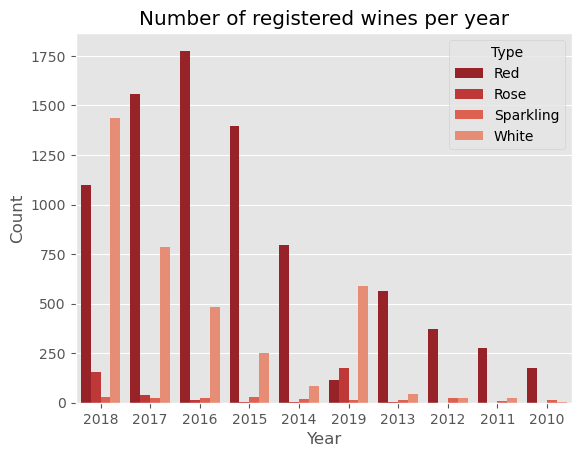

In [257]:
ax = sns.countplot(data=df, x='Year', hue='Type', order=df['Year'].value_counts().iloc[:10].index, palette=palette)
plt.ylabel('Count')
plt.title('Number of registered wines per year')
plt.show()

In [258]:
ax.get_figure().savefig('wines_n_per_year.png', dpi=500, bbox_inches='tight')

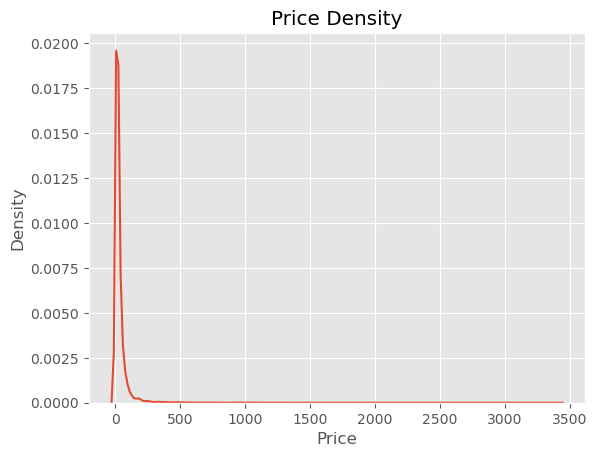

In [259]:
ax = sns.kdeplot(data=df, x="Price")
plt.title('Price Density')
plt.show()

In [265]:
ax.get_figure().savefig('wine_price_density.png', dpi=500, bbox_inches='tight')

# Feature Relationships

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


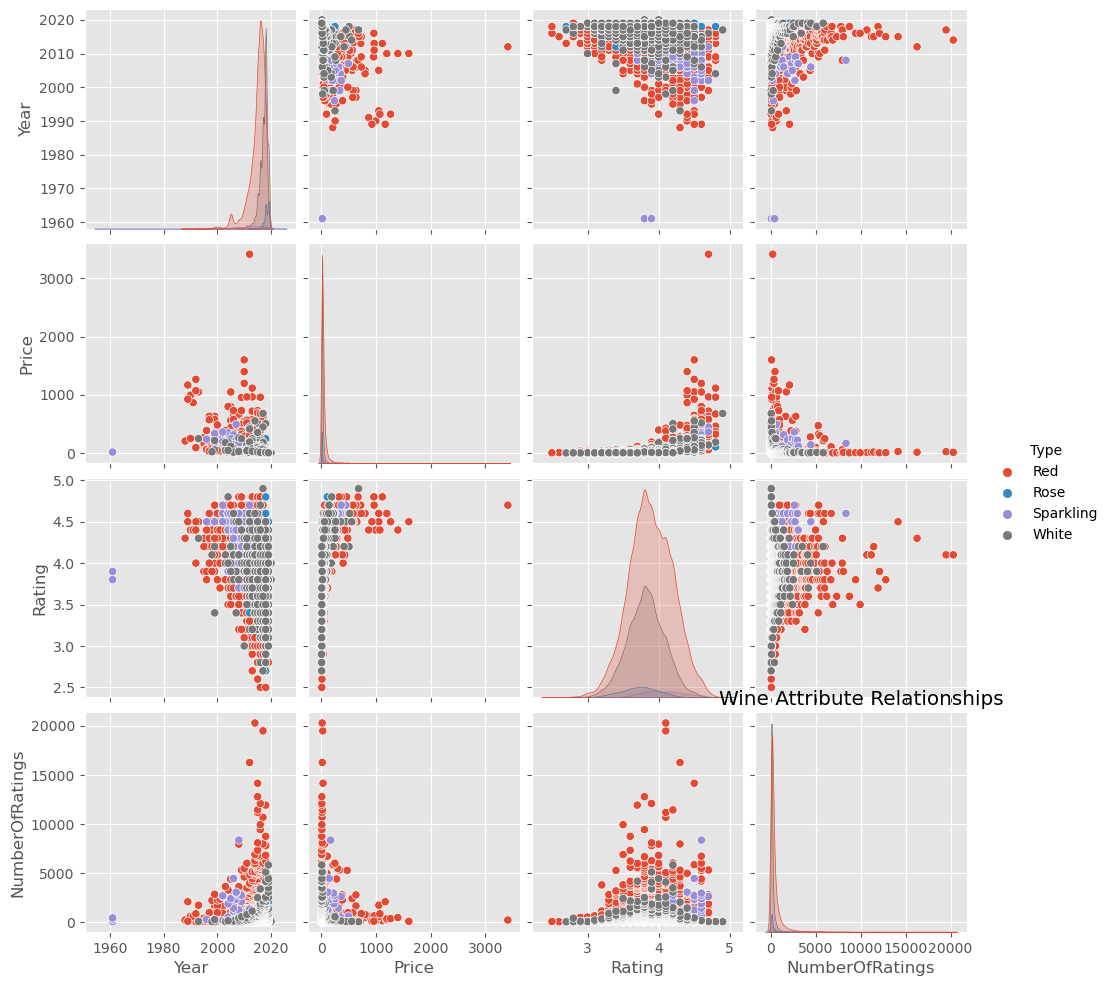

In [267]:
ax = sns.pairplot(df, vars=['Year','Price', 'Rating','NumberOfRatings'], hue="Type")
plt.title("Wine Attribute Relationships")
plt.show()

In [269]:
ax.fig.savefig('wine_attr_rel.png', dpi=500, bbox_inches='tight')

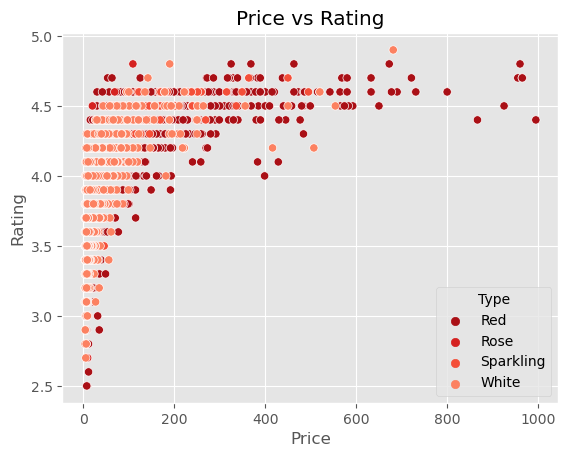

In [276]:
ax = sns.scatterplot(data=df[df["Price"] < 1000], x='Price', y='Rating', hue='Type', palette=palette)
plt.title('Price vs Rating')
plt.show()

In [278]:
ax.get_figure().savefig('wines_price_vs_rating.png', dpi=500, bbox_inches='tight')

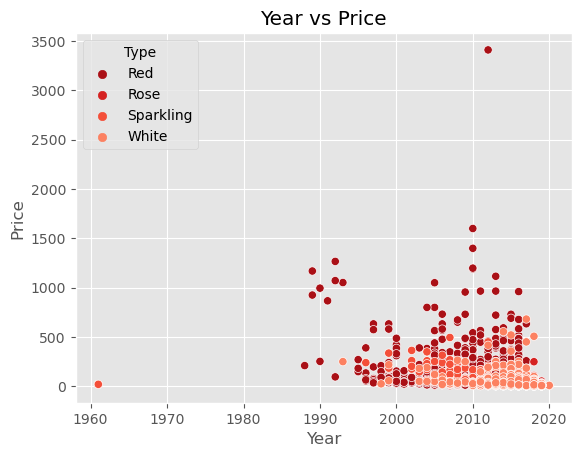

In [281]:
ax = sns.scatterplot(data=df, x='Year', y='Price', hue='Type', palette=palette)
plt.title('Year vs Price')
plt.show()

In [282]:
ax.get_figure().savefig('wines_year_vs_price.png', dpi=500, bbox_inches='tight')

In [238]:
df.query("Year < 1965").head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
9093,‘61 Franciacorta Rosé 1961,Italy,Franciacorta,Berlucchi,3.8,37,18.91,1961,Sparkling
9259,‘61 Franciacorta Brut 1961,Italy,Lombardia,Berlucchi,3.9,282,17.95,1961,Sparkling
9286,‘61 Franciacorta Satèn 1961,Italy,Franciacorta,Berlucchi,3.9,421,19.90,1961,Sparkling


In [242]:
df.query("Price > 3000").head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
2340,Pomerol 2012,France,Pomerol,Pétrus,4.7,204,3410.79,2012,Red


In [250]:
df_corr = df[['Year','Price','Rating','NumberOfRatings']].corr()
df_corr

,Year,Price,Rating,NumberOfRatings
Year,1.000000,-0.378608,-0.340367,-0.077304
Price,-0.378608,1.000000,0.449717,0.028908
Rating,-0.340367,0.449717,1.000000,0.087451
NumberOfRatings,-0.077304,0.028908,0.087451,1.000000


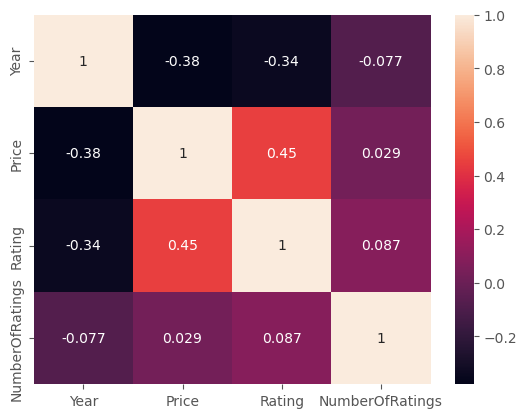

In [283]:
ax = sns.heatmap(df_corr, annot=True)

In [284]:
ax.get_figure().savefig('wines_corr.png', dpi=500, bbox_inches='tight')